In [3]:
import numpy as np
p_win = 0.4
goal = 100
eps = 1e-9
states = np.arange(goal + 1)
V = np.zeros(goal + 1)
V[goal] = 1.0
policy = np.zeros(goal + 1, dtype=int)

In [4]:
while True:
    delta = 0.0
    for s in states[1:goal]:
        old_v = V[s]
        bets = range(1, min(s, goal - s) + 1)
        best = 0.0
        for b in bets:
            win_state = s + b
            lose_state = s - b
            val = (
                p_win * V[win_state] +
                (1 - p_win) * V[lose_state]
            )
            best = max(best, val)
        V[s] = best
        delta = max(delta, abs(old_v - V[s]))
    if delta < eps:
        break

In [5]:
for s in states[1:goal]:
    bets = range(1, min(s, goal - s) + 1)
    values = []
    for b in bets:
        val = (
            p_win * V[s + b] +
            (1 - p_win) * V[s - b]
        )
        values.append(val)
    policy[s] = bets[np.argmax(values)]

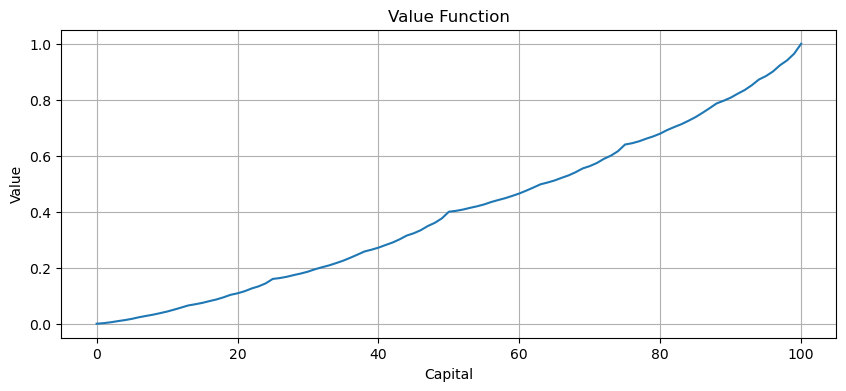

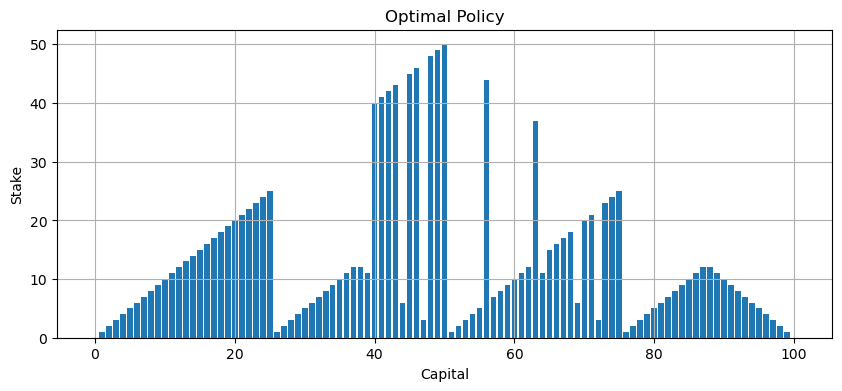

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(V)
plt.xlabel("Capital")
plt.ylabel("Value")
plt.title("Value Function")
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(states, policy)
plt.xlabel("Capital")
plt.ylabel("Stake")
plt.title("Optimal Policy")
plt.grid()
plt.show()